In [3]:
%load_ext autoreload
%autoreload 2

In [53]:
image_id = "CA171932V0114"

In [54]:
import shapely

import src.base.connect_to_database as ctd

conn = ctd.establish_connection()

sql_string = f"SELECT * FROM images WHERE image_id = '{image_id}'"
data = ctd.execute_sql(sql_string, conn)
data = data.iloc[0]

x = data["x_coords"]
y = data["y_coords"]
azimuth = data["azimuth"]
view_direction = data["view_direction"]
altitude = data["altitude"]

center = shapely.Point(x, y)

sql_string_e = f"SELECT focal_length, ST_AsText(footprint_approx) AS footprint_approx FROM images_extracted WHERE image_id = '{image_id}'"
data_e = ctd.execute_sql(sql_string_e, conn)
data_e = data_e.iloc[0]

focal_length = data_e["focal_length"]
approx_poly_existing = data_e["footprint_approx"]

print(f"center: {center}, azimuth: {azimuth}, view_direction: {view_direction}, altitude: {altitude}, focal_length: {focal_length}")


center: POINT (-1534747.93 -614725), azimuth: 66.817, view_direction: V, altitude: 25000.0, focal_length: None


In [55]:
import src.prepare.calc_approximate_footprint as caf

approx_poly_without_rema = caf.calc_approximate_footprint(center=center, azimuth=azimuth, view_direction=view_direction, altitude=altitude, focal_length=focal_length, adapt_with_rema=False)

approx_poly = caf.calc_approximate_footprint(center=center, azimuth=azimuth, view_direction=view_direction, altitude=altitude, focal_length=focal_length, adapt_with_rema=True)


TypeError: unsupported operand type(s) for /: 'NoneType' and 'int'

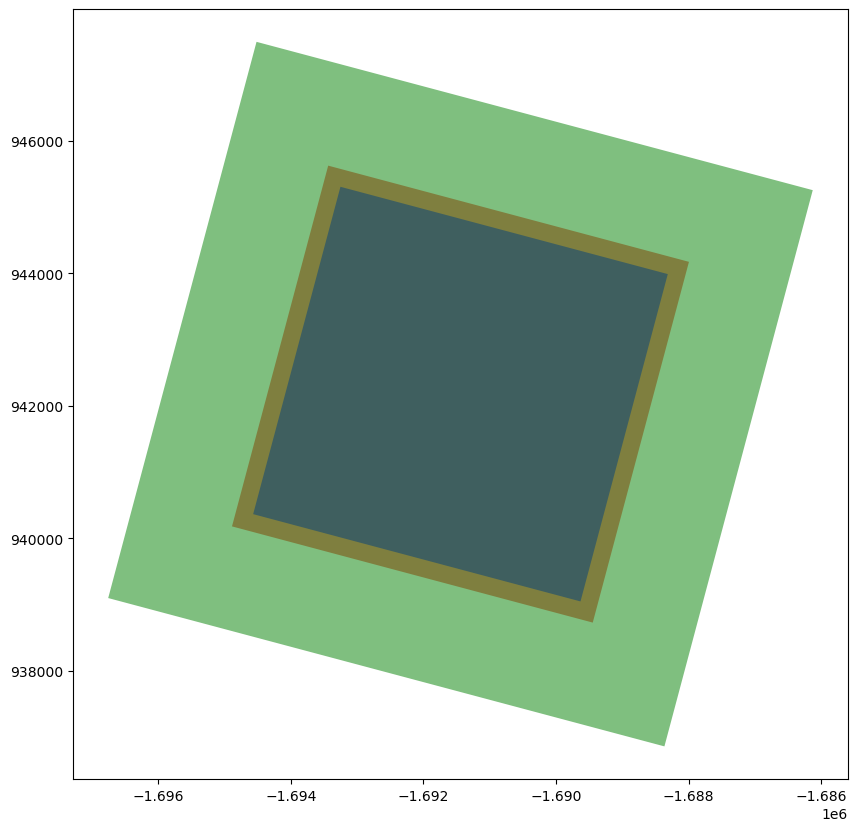

In [52]:
import src.display.display_shapes as ds

style_config = {
    "colors": ["red", "blue", "green"],
}
ds.display_shapes([approx_poly_without_rema, approx_poly, approx_poly_existing], style_config=style_config)